# Data Challenge - Nubank 
- Rafael Bicudo Rosa
- 25/10/2018

### Introdução

Este projeto é parte integrante da competição organizada pela Udacity com o intuito de simular um problema real de Data Science providos por empresas data driven. No caso, dados fornecidos pela Nubank, muito similares aos encontrados em sua base de clientes, serão usados para resolver dois problemas de negócio da empresa: o risco de de defaut de crédito e a estimativa de limite de crédito inicial. 

Os dados em si são compostos de 3 tabelas: informações quantitativas e qualitativas sobre os clientes e seu histórico financeiro disponível - nome, renda, documentos, informações demográficas, redes sociais, canal de captação, dentre outros; e histórico de gastos desses mesmos - obervações mensais de seus gastos em relação ao limite, além de outros informações relacionadas ao uso do produto; e, por fim, uma tabela idêntica à primeira para usar de teste e submissão dos resultados.

A abordagem será dividida em etapas descritas ao longo dos títulos subsequentes, mas, em resumo, serão abrangidas a abertura, limpeza, exploração e modelagem dos dados.

# Abertura dos arquivos

Configurações e pacotes iniciais para começar a exploração.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import gc
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Ajuda a otimizar o uso da memória
gc.enable()

Função para resumir principais informações preliminares do dataframe.

In [3]:
def summary_info_df (df):
# Printa diversos informações referentes ao df
    print ("Rows     : " ,df.shape[0])
    print ("Columns  : " ,df.shape[1]) 
    print ("\nFeatures : \n" ,df.columns.tolist()) #
    print ("\nMissing values :  ", df.isnull().sum().values.sum())
    print ("\nUnique values :  \n",df.nunique()) 
    print ("\nData Types :  \n",df.dtypes) 

Abertura, vizualização preliminar e call da função no 1o arquivo.

In [4]:
acquisition = pd.read_csv('data/acquisition_train.csv')
acquisition.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [4]:
summary_info_df(acquisition)

Rows     :  45000
Columns  :  43

Features : 
 ['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit', 'reason', 'income', 'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_applied', 'application_time_in_funnel', 'email', 'external_data_provider_credit_checks_last_2_year', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 'external_data_provider_first_name', 'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel', 'profile_phone_number', 'reported_income', 'shipping_state', 'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud']

Missing values :   219437

Unique values :  
 ids                                                 45000
target_

Abertura, vizualização preliminar e call da função no 2o arquivo.

In [5]:
spend = pd.read_csv('data/spend_train.csv')
spend.head()

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs
0,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,0,6305.06,35.56,1,0.00
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00
2,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,2,7167.94,0.00,0,0.00
3,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,3,16631.05,0.00,1,5.55
4,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,4,115.29,0.00,0,6.89


In [6]:
summary_info_df(spend)

Rows     :  980818
Columns  :  7

Features : 
 ['ids', 'credit_line', 'month', 'spends', 'revolving_balance', 'card_request', 'minutes_cs']

Missing values :   0

Unique values :  
 ids                   45000
credit_line           14079
month                    36
spends               277283
revolving_balance     70195
card_request              2
minutes_cs             2130
dtype: int64

Data Types :  
 ids                   object
credit_line            int64
month                  int64
spends               float64
revolving_balance    float64
card_request           int64
minutes_cs           float64
dtype: object


Abertura, vizualização preliminar e call da função no 3o arquivo.

In [7]:
teste = pd.read_csv('data/acquisition_test.csv')

In [8]:
summary_info_df(teste)

Rows     :  19592
Columns  :  41

Features : 
 ['ids', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit', 'reason', 'income', 'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_applied', 'application_time_in_funnel', 'email', 'external_data_provider_credit_checks_last_2_year', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 'external_data_provider_first_name', 'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel', 'profile_phone_number', 'reported_income', 'shipping_state', 'shipping_zip_code', 'profile_tags', 'user_agent']

Missing values :   74559

Unique values :  
 ids                                                 19592
score_1                                   

Como visto acima, os dados possuem muitas transformações necessárias para conseguir fazer análise plena em todas as variáveis, como trnasformações dos dtypes, ajuste de categóricas, variáveis sem muita informação. Começarei com isso abaixo.

# Data Cleaning

Como os dados de acquisition e teste possuem a mesma estrutura, realizarei as transformações necessárias de forma conjunta para evitar inconsistências. Iniciarei com o reagrupamento dos dados em estruturas mais organizadas para, em seguida, realizar as transformações.

### Modificações Preliminares

Reagrupamento dos dados em variáveis explicativas e resposta.

In [17]:
# separação das variáveis preditoras nos dados de treino
acquisition_X = acquisition.iloc[:, 2:-1].copy()

# separação das variáveis resposta dos dados de treino
acquisition_y = acquisition[['target_default']].copy().astype('bool')
fraud_y = acquisition[['target_fraud']].copy()

# separação das variáveis preditoras nos dados de teste e formação do combo set
teste_X = teste.iloc[:, 1:].copy()
combo_X = pd.concat([acquisition_X, teste_X])
combo_X.describe() 

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,63807.000000,64592.000000,64592.000000,64592.000000,63807.000000,21643.000000,21643.000000,44839.000000,6.380700e+04,26554.000000,...,63807.000000,48141.000000,64592.000000,32200.0,64592.00000,42849.000000,61366.000000,64592.000000,6.459200e+04,64592.000000
mean,348.031877,99.997870,0.499220,99.942719,0.296404,13811.507536,41.798457,34562.007560,7.180972e+04,35.174249,...,10.681164,11.044847,247.296709,0.0,1.49712,0.503209,12.424127,501.065674,inf,33930.017773
std,110.064626,3.170869,0.288769,10.034220,0.101549,8078.113639,10.273546,37041.867093,5.124993e+04,21.663679,...,4.583902,4.576030,146.073105,0.0,1.11553,0.499996,126.854506,288.673565,NaN,12680.019853
min,0.000000,86.191572,0.000035,60.663039,0.000000,730.050000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,-999.000000,0.000000,4.030000e+02,12001.000000
25%,270.000000,97.858659,0.250295,93.210322,0.220000,7524.980000,36.000000,10000.000000,4.501336e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.00000,0.000000,11.000000,251.000000,5.079850e+04,22959.000000
50%,340.000000,100.006042,0.498237,99.975654,0.290000,12024.210000,36.000000,25775.000000,6.139916e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,1.00000,1.000000,27.000000,503.000000,1.017605e+05,33844.500000
75%,420.000000,102.131648,0.749190,106.698884,0.360000,19218.025000,36.000000,47326.500000,8.602645e+04,50.000000,...,13.000000,14.000000,374.000000,0.0,2.00000,1.000000,43.000000,750.000000,1.513790e+05,44911.000000
max,990.000000,113.978234,0.999982,142.430069,0.900000,35059.600000,60.000000,613117.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.00000,1.000000,59.000000,1000.000000,inf,56000.000000


Como visto acima, talvez por erro de extração na origem, ou qualquer outro motivo, a coluna "reported_income" possui valores inf, assim eliminá-los será a primeira conduta.

In [18]:
combo_X.reported_income.replace([np.inf, -np.inf], np.nan, inplace = True)

Variáveis descartadas por não terem informação facilmente obtíveis, ou conseguidas via outras variáveis. Poderiam ser melhor trabalhadas em outra oportunidade: lat_lon (poderia dar origem a 2 features novas para realização de clusterização, ou analisar a interação quantitativa da região), application_time_applied (se se entendesse a raiz do problema com horários com 60 min, deixarei o código disponível abaixo), external_data_provider_first_name (NLP, embora a maioria dos nomes não se repita).

In [16]:
#from datetime import datetime
#datetime.strptime(acquisition.application_time_applied, '%H:%M:%S')
#acquisition.application_time_applied = acquisition.application_time_applied.map(lambda x: datetime.strptime(x, '%H:%M:%S'))
# valores como 00:60:02 inviabilizam o rolê

In [19]:
# Variáveis com pouca informação, ou de difícil obtenção
discVars = [
    'zip', 'job_name', 'lat_lon', 'profile_phone_number', 
    'application_time_applied','shipping_zip_code', 'profile_tags', 'user_agent', 
    'reason', 'external_data_provider_first_name'
]

#visualização das acima descritas
combo_X[discVars].head()

,zip,job_name,lat_lon,profile_phone_number,application_time_applied,shipping_zip_code,profile_tags,user_agent,reason,external_data_provider_first_name
0,Ernn+uVXCMq/6ARrBCcd+A==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-29.151545708122246, -51.1386461804385)",514-9840782,07:52:34,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,leidelaura
1,rlWIXTBO+VOa34+SpGyhlQ==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-19.687710705798963, -47.94151536525154)",251-3659293,02:34:29,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,diocezio
2,PjTIDfJsK0DKL9fO7vuW2g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-28.748023890412284, -51.867279334353995)",230-6097993,00:60:02,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,veralucia
3,Cc/kWDLQH3dpHv5HU+pLVA==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,"(-17.520650158450454, -39.75801139933186)",261-3543751,11:20:49,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,venice
4,i036nmJ7rfxo+3EvCD7Jnw==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-16.574259446978008, -39.90990074785962)",102-3660162,13:39:03,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,darzisa


Colunas com apenas 1 valor também serão excluídas por não possuírem informação.

In [20]:
noVar = [feature for feature in combo_X.columns if combo_X[feature].nunique() == 1]
noVar

['channel', 'external_data_provider_credit_checks_last_2_year']

Exlusões propriamente ditas. Vale ressaltar que reseto o index para fazer a manutenção do original como coluna, e conseguir fazer manipulações pelo número de linhas.

In [22]:
combo_X.drop(discVars, axis = 1, inplace = True)

combo_X.drop(noVar, axis = 1, inplace = True)
combo_X.reset_index(inplace=True)

KeyError: "labels ['zip' 'job_name' 'lat_lon' 'profile_phone_number'\n 'application_time_applied' 'shipping_zip_code' 'profile_tags'\n 'user_agent' 'reason' 'external_data_provider_first_name'] not contained in axis"

### Label Encoding

Por fim, criarei uma função para transformar as variáveis categóricas em labels a partir de seus níveis, identificadas em uma list comprehension feita em seguida, com o intuito de melhor analizá-las na próxima etapa.

In [23]:
# Função para geração das labels
def do_labelEncoding(df, columns, out = True):
    # Pacote utilizado para gerar as labels
    from sklearn.preprocessing import LabelEncoder
    df = df.copy()
    for column in columns:
        df[column+'_label'] = LabelEncoder().fit_transform(df[column].astype(str)) # Conversão necessária para funcionamento
        df.drop(column, axis = 1, inplace = out) # drop da coluna antiga ou não
    return df

In [24]:
# Pacote para uso do regex
import re 

# List comprehension que
catFeatures = [
feature for feature in combo_X.columns if len(combo_X[feature].unique()) <= 51 and  not bool(re.search("^n_", feature))
]

In [25]:
# Call da função
combo_X_clean = do_labelEncoding(combo_X, catFeatures)

# Análise dos resultados
combo_X_clean.dtypes

index                                                      int64
score_3                                                  float64
score_4                                                  float64
score_5                                                  float64
score_6                                                  float64
risk_rate                                                float64
last_amount_borrowed                                     float64
credit_limit                                             float64
income                                                   float64
ok_since                                                 float64
n_bankruptcies                                           float64
n_defaulted_loans                                        float64
n_accounts                                               float64
n_issues                                                 float64
application_time_in_funnel                                 int64
external_data_provider_em

### Transformações do DF Spend

Como o objetivo do trabalho inclui, também, qual será o limite inicial de um futuro cliente baseado em suas características, usarei os primeiros 3 meses de gastos de cada um dos clientes atuais como parâmetro de quanto um cliente gasta inicialmente na média (usando o nome sugerido pelas instruções do exercício).

In [35]:
# Agregação dos gastos médios nos primeiros 3 meses de cada cliente
pv_3m = spend.loc[spend.month < 3, :].groupby(['ids']).spends.mean()

# junção ao df inicial para transformação em df, com o mesmo index dos demais
spend_y = acquisition[['ids']].join(pv_3m, on = 'ids', how = 'left')
spend_y.drop(['ids'], axis = 1, inplace = True)

# EDA 

Assim como descrito acima, usarei as variáveis transformadas para facilitar a identificação de relações. À medida em que forem encontradas evidências ou relações interessantes, essas serão destrinchadas para melhor análise e compreensão usando os dados originais.

### Análise Univariada

Como primeira etapa, olharemos a distribuição univariada de todas as variáveis. Nela, será possível ver os diferentes formatos de distribuição entre todas. Em seguida, olharei a distribuição do principal problema do relatório: quantidade defaults.

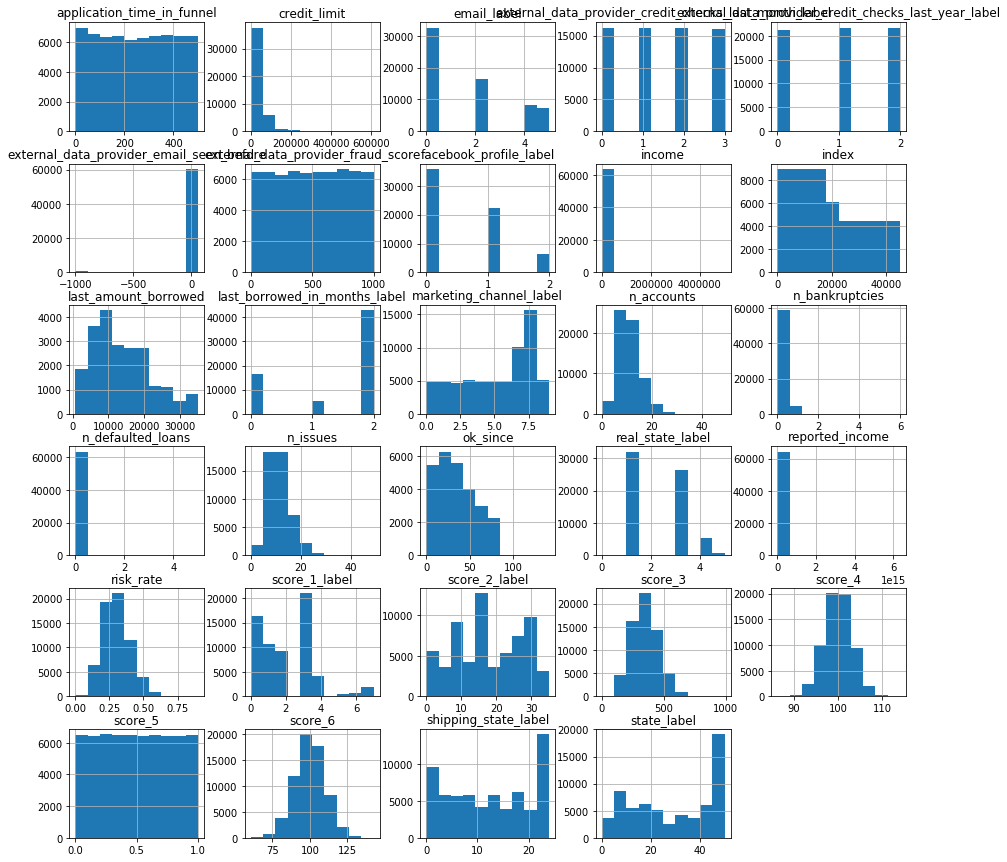

In [33]:
# Histograma Univariado
combo_X_clean.hist(figsize=(15,15))
plt.show()

Text(0,0.5,'Porcentagem')

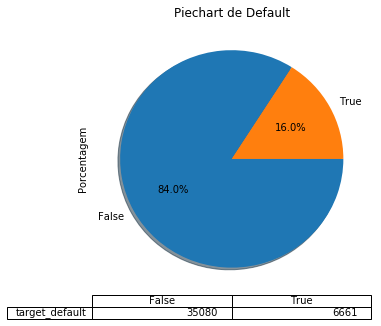

In [42]:
plt.figure(figsize=(5,5))
acquisition['target_default'].value_counts().plot(
    kind='pie', table=True, autopct='%1.1f%%', # Instruções usadas para gerar a porcentagem dentro do Piechart
    counterclock=False, shadow=True
)
plt.title('Piechart de Default')
plt.ylabel('Porcentagem')

É interessante notar o claro desbalanceamento entre as classes, já indicando que, talvez, acurácia não seja um dos melhores indicadores de qualidade do modelo, a menos que se consigam mais dados ou se use algum método de compensação como o SMOTE.

Text(0,0.5,'Densidade')

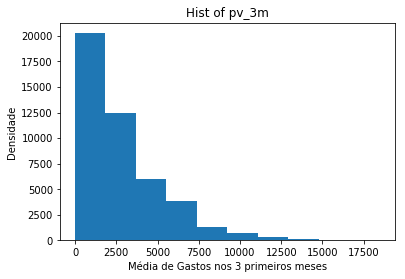

In [40]:
plt.hist(pv_3m)
plt.title('Hist of pv_3m')
plt.xlabel('Média de Gastos nos 3 primeiros meses')
plt.ylabel('Densidade')

Assim como visto acima, percebe-se uma distribuição extremamente concentrada em valores menores com alta dispersão em valores maiores. Isso indica que a média não seria um representante tão fiel da amostra, e que uma transformações podem ser favoráveis ára normalização da distribuição, melhorando a performance de alguns algorítmos como a regressão linear.

### Análise Bivariada

Nesta seção, usaremos a matriz de correlações de Pearson para ter um primeiro olhar sobre as interações entre as variáveis e entender melhor como se relacionam. Para tal, usarei as variáveis alvo separadas no início e passá-las pela mesma transformação dos dados explicativos.

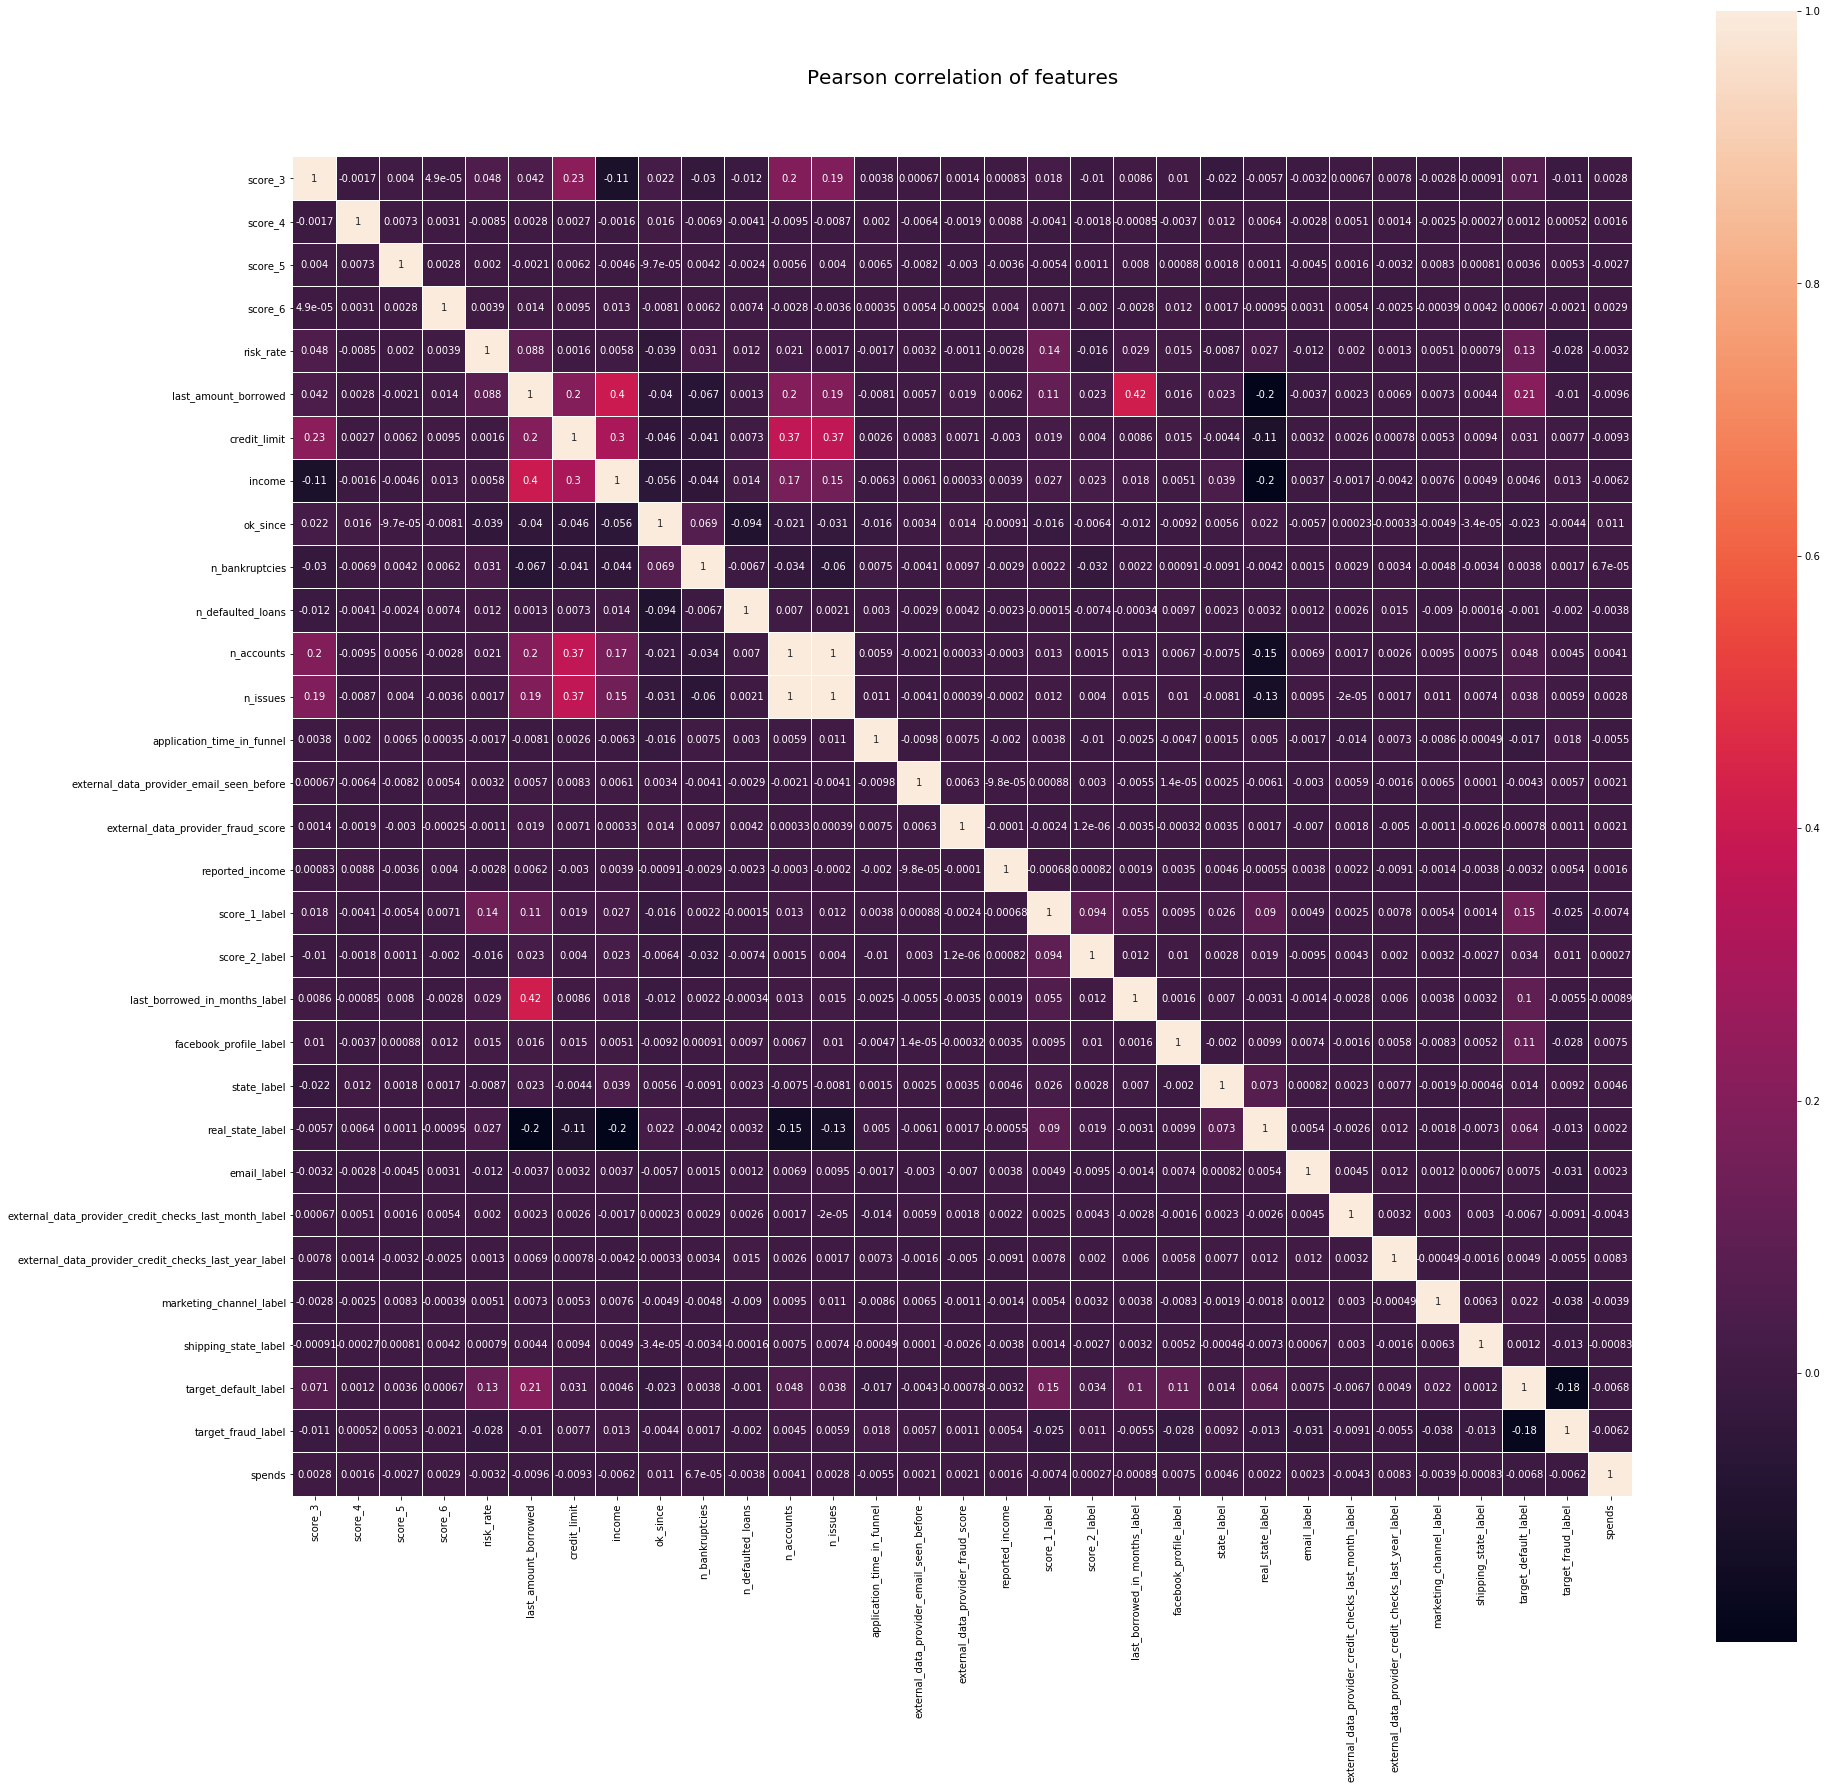

In [51]:
# Matriz só com as variáveis targets transformadas
target_label = do_labelEncoding(
    acquisition[['target_default', 'target_fraud']], ['target_default', 'target_fraud']
)

# Plot da matriz de correlação entre os dados
plt.figure(figsize=(30,30))
plt.title('Pearson correlation of features', y=1.05, size=20)
sns.heatmap(
    pd.concat([combo_X_clean.iloc[0:45000, 1:], target_label, spend_y], axis = 1).corr(), # df de todas as variáveis do trabalho
    linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True
)

É interessante notar como boa partes das variáveis não possui uma correlação linear tão aparente, principalmente em relação aos gastos (possui correlação baixíssima com todas as variáveis), no entanto explorarei abaixo essas poucas correlações que se destacam procurando informações mais interessantes. Vale ressaltar que, para preservar os nomes originais das variáveis categóricas, usarei em alguns casos o dataset original.

Text(0,0.5,'Densidade')

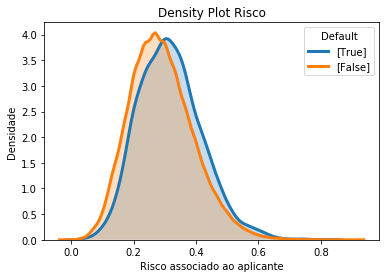

In [38]:
# Iteração com as variáveis
for feature in [True, False]:
    # Subset em relação a cada
    subset = acquisition[acquisition['target_default'] == feature]
    
    # density plot
    sns.distplot(subset['risk_rate'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = subset['target_default'].unique())
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Default')
plt.title('Density Plot Risco')
plt.xlabel('Risco associado ao aplicante')
plt.ylabel('Densidade')

Primeiramente, vemos como a mediana da distribuição de risk_rate se altera levemente em relação a target_default

Text(0,0.5,'Default')

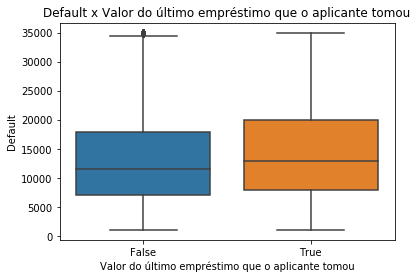

In [43]:
sns.boxplot(y = 'last_amount_borrowed', x = 'target_default', data = acquisition)
plt.title('Default x Valor do último empréstimo que o aplicante tomou')
plt.xlabel('Valor do último empréstimo que o aplicante tomou')
plt.ylabel('Default')

Mesmo movimento encontrado em last_amount_borrowed, agora visto sob a perspectiva de boxplots.

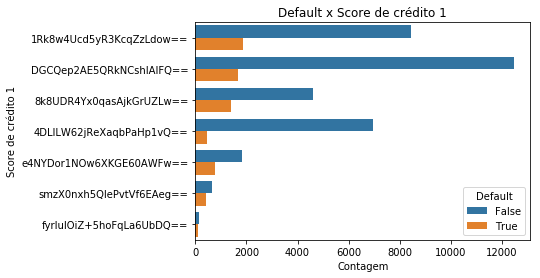

In [44]:
sns.countplot(y = 'score_1', hue = 'target_default', data = acquisition)
plt.title('Default x Score de crédito 1')
plt.xlabel('Contagem')
plt.ylabel('Score de crédito 1')
plt.legend(prop={'size': 10}, title = 'Default')

Entre as variáveis categóricas mais correlacionadas com os Defaults, está score_1. Repare como, a depender da categoria, a proporção entre bons e maus pagadores varia razoavelmente.

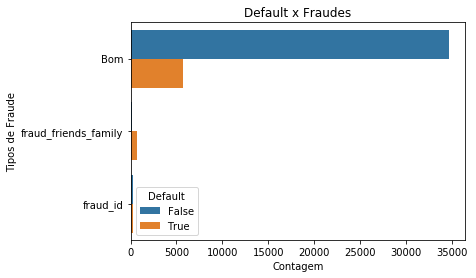

In [53]:
sns.countplot(
    y = acquisition['target_fraud'].fillna('Bom'), hue = acquisition['target_default'] # modificação para ver NA's na plotagem
)
plt.title('Default x Fraude')
plt.xlabel('Contagem')
plt.ylabel('Fraude')
plt.legend(prop={'size': 10}, title = 'Default')

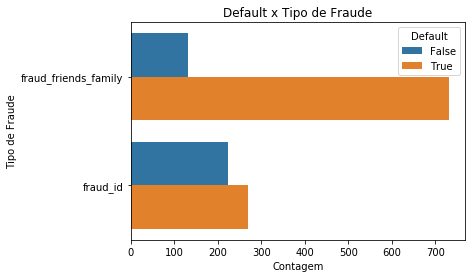

In [54]:
sns.countplot(
    y = acquisition['target_fraud'], hue = acquisition['target_default'] # nesta, só se verá os casos de fraude
)
plt.title('Default x Tipo de Fraude')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Fraude')
plt.legend(prop={'size': 10}, title = 'Default')

Usei as duas plotagens para ver qual a proporção dos casos fraudulentos da amostra e, em seguida, qual a diferença entre os 2 casos de fraude encontrados. É notável como, além das detecções de fraude possuírem uma incidência maior de inadimplência, ela aumenta ainda maior de forma expressiva quando no casos de amigos e  família.

### Análise Multivariada

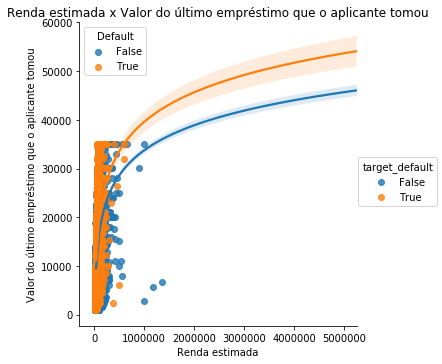

In [74]:
sns.lmplot( 
    x="income", y="last_amount_borrowed", hue="target_default", data=acquisition,
    logx=True
)
plt.title('Renda estimada x Valor do último empréstimo que o aplicante tomou')
plt.xlabel('Renda estimada')
plt.ylabel('Valor do último empréstimo que o aplicante tomou')
plt.legend(prop={'size': 10}, title = 'Default')

Como 1a exploração envolvendo mais de 1 variável, vê-se uma boa diferença de tendência entre a correlação de ambas as variáveis em relação a dar ou não default

### 1.3

# Baseline Approach

### Missing Values

In [84]:
#def create_dummies(df,column_names, limit = 51):
#    df = df.copy()
#    for feature in column_names:
#        if len(df[feature].unique())>2 and len(df[feature].unique()) <= limit:
#            dummies = pd.get_dummies(df[feature],prefix=feature,dummy_na=True, drop_first = False) # não sei ao certo se caga colocar true
#            df = pd.concat([df,dummies],axis=1)
#            df.drop(feature, axis = 1, inplace = True)
#    return df

In [85]:
#combo_x_bl_ohe = create_dummies(combo_x_bl, combo_x_bl.columns)
#for feature in acquisition_ohe.columns:
#    if acquisition_ohe[feature].nunique() == 1:
#        acquisition_ohe.drop([feature], axis = 1, inplace = True)

In [219]:
combo_x_bl.fillna(-10, inplace=True)

### Array de Propensão a gasto

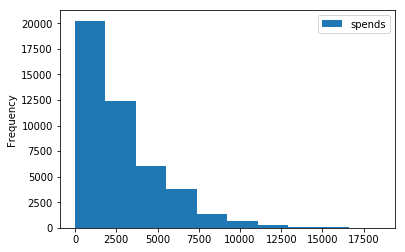

In [296]:
spend_bl_y = acquisition[['ids']].join(pv_3m, on = 'ids', how = 'left')
spend_bl_y.drop(['ids'], axis = 1, inplace = True); spend_bl_y.plot.hist()

### Array de Fraude

Abordagem inicial considerando todos os tipos de fraude como um só e os NaN como não fraudulentos.

In [221]:
fraud_bl_y.replace(np.nan, False, inplace = True)
fraud_bl_y.loc[fraud_bl_y.target_fraud != False] = True; fraud_bl_y.describe()

,target_fraud
count,45000
unique,2
top,False
freq,43478


### Baseline Models

Parâmetros comuns a todo o trabalho

In [222]:
# Definindo o tamanho das amostras
teste_size = 0.3

# Garante que os resultados podem ser reproduzidos
seed = 666

# Quantidade de CV a serem usadas
num_folds = 5


Funções para otimizar teste de diversos modelos junto a CVs e avaliar desempenho nos dados de teste

In [223]:
# Import do módulo
from sklearn import model_selection
from sklearn.metrics import roc_auc_score, mean_squared_error

## Função para comparação
def compara_cv_modelos (X, y, modelos, num_folds = num_folds, seed = seed, scoring = 'roc_auc', Stratified = False):
    # Avaliando cada modelo
    resultados = []
    nomes = []
    
    for nome, modelo in modelos:
        if Stratified:
            kfold = model_selection.StratifiedKFold(n_splits = num_folds, random_state = seed)# stratified é necessário para class imbalance 
        else:
            kfold = model_selection.KFold(n_splits = num_folds, random_state = seed)
            
        cv_results = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = scoring)
        resultados.append(cv_results)
        nomes.append(nome)
        msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
        print(msg)
   # Boxplot para comparar os algoritmos
    fig = plt.figure()
    fig.suptitle('Comparação de Algoritmos de Classificação')
    ax = fig.add_subplot(111)
    plt.boxplot(resultados)
    ax.set_xticklabels(nomes)
    plt.show() 
    
def eval_model_c(X_treino, X_teste, y_treino, y_teste, modelos):
    for nome,modelo in modelos:
        modelo.fit(X_treino, y_treino)
        # Compute predicted probabilities: y_pred_prob
        y_pred_prob = modelo.predict_proba(X_teste)[:,1]
        # Compute and print AUC score
        msg = "%s: %f" % (nome, roc_auc_score(y_teste, y_pred_prob))
        print(msg)

def eval_model_r(X_treino, X_teste, y_treino, y_teste, modelos):
    for nome,modelo in modelos:
        modelo.fit(X_treino, y_treino)
        # Compute predicted values
        y_pred = modelo.predict(X_teste)
        # Compute and print AUC score
        msg = "%s: %f" % (nome, mean_squared_error(y_teste, y_pred))
        print(msg)

Tupples de algorítmos de regressão e classificação

In [224]:
## Classificação

# Import dos módulos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC # só usarei quando houver menos dimensões, senão demora demais para treinar
from xgboost import XGBClassifier

# Preparando os modelo
modelos_cla = []
modelos_cla.append(('LR', LogisticRegression()))
#modelos_cla.append(('LDA', LinearDiscriminantAnalysis()))
modelos_cla.append(('NB', GaussianNB()))
#modelos_cla.append(('KNN', KNeighborsClassifier()))
modelos_cla.append(('RF', RandomForestClassifier()))
#modelos.append(('SVM', SVC()))
modelos_cla.append(('XGB', XGBClassifier()))

## Regressão
# Import dos módulos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
#from sklearn.svm import SVC
from xgboost import XGBRegressor

# Preparando os modelo
modelos_reg = []
modelos_reg.append(('LR', LinearRegression()))
modelos_reg.append(('EN', ElasticNet()))
#modelos_reg.append(('KNN', KNeighborsRegressor()))
modelos_reg.append(('RF', RandomForestRegressor()))
#modelos_reg.append(('SVM', SVC()))
modelos_reg.append(('XGB', XGBRegressor()))


Separação de Teste e Treino

In [346]:
# Separando os dados em teste e treino
X_bl_treino = combo_x_bl.iloc[0:45000, 1:]
X_bl_teste = combo_x_bl.iloc[45000:, 1:]

### Risco de Crédito

Retirada das observações com missing na variável target.

In [226]:
acquisition_bl_y.dropna(inplace = True)
X_bl_treino_credit = X_bl_treino.iloc[acquisition_bl_y.index, :]

Call da função com os parâmetros definidos acima.

LR: 0.498210 (0.005432)
NB: 0.553586 (0.006195)
RF: 0.686098 (0.003796)
XGB: 0.765687 (0.006644)


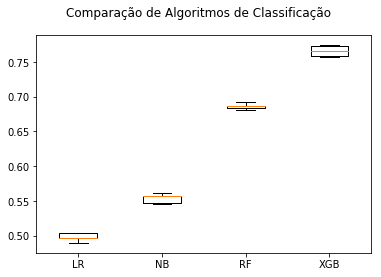

In [227]:
compara_cv_modelos (X_bl_treino_credit, acquisition_bl_y, modelos_cla, Stratified = True)

### Propensão a Gasto

Call da Função.

LR: -6052451.976171 (74869.995941)
EN: -6050473.344083 (74559.005165)
RF: -6879395.853294 (79313.649836)
XGB: -6072104.090968 (72945.887419)


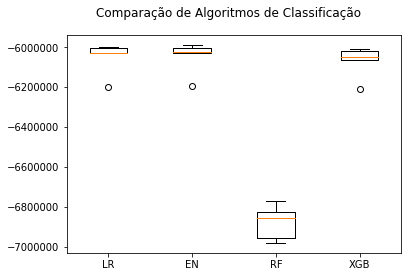

In [297]:
# Function call
compara_cv_modelos (X_bl_treino, spend_bl_y, modelos_reg, scoring = 'neg_mean_squared_error')

### Risco de Fraude

Call da Função

LR: -0.692370 (0.000608)
NB: -1.476203 (2.652541)
RF: -0.729336 (0.014793)
XGB: -0.133712 (0.001282)


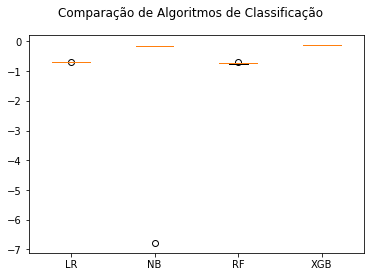

In [93]:
compara_cv_modelos (X_bl_treino, fraud_bl_y, modelos_cla, Stratified = True, scoring = 'neg_log_loss')

# Feature Engineering

### Modificações Preliminares

Repetição dos passos realizados anteriormente, no entanto com o intuito de melhor tratar os dados para tentar aprimorar a análise. Vale ressaltar, também, a exclusão de 'n_issues' pela colinearidade plena.

In [298]:
acquisition_fe_y = acquisition[['target_default']].copy().astype('bool')
fraud_fe_y = acquisition[['target_fraud']].copy()
spend_fe_y = spend_bl_y.copy()
acquisition_X = acquisition.iloc[:, 2:-1].copy()
combo_x = pd.concat([acquisition_X, teste.iloc[:, 1:].copy()])

In [299]:
combo_x.drop(discVars, axis = 1, inplace = True)
combo_x.drop(noVar, axis = 1, inplace = True)
combo_x.drop(['n_issues'], axis = 1, inplace = True)
combo_x.reset_index(inplace=True)

### Missing Values

In [300]:
# colunas com missing values
missingValueColumns = combo_x.columns[combo_x.isnull().any()].tolist()
combo_x_null = combo_x[missingValueColumns] 

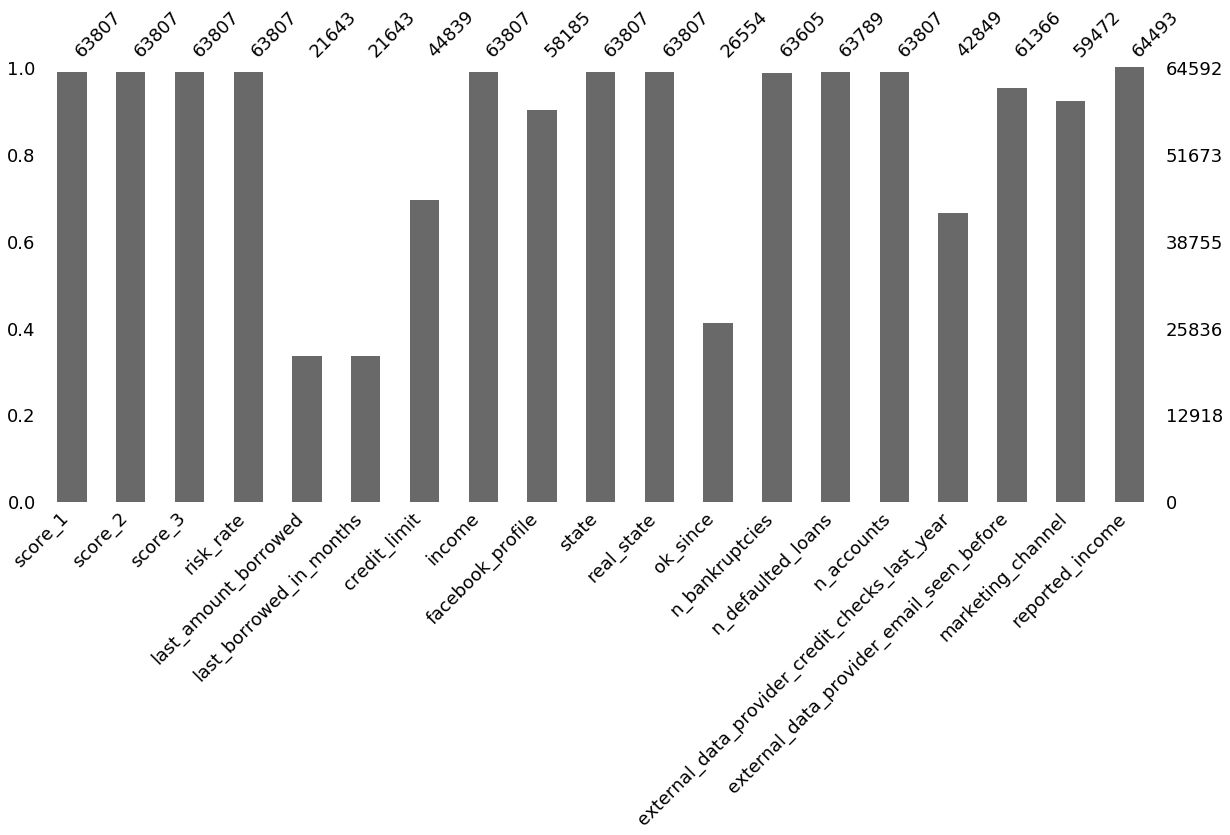

In [301]:
msno.bar(combo_x_null,figsize=(20,8),fontsize=18,labels=True)

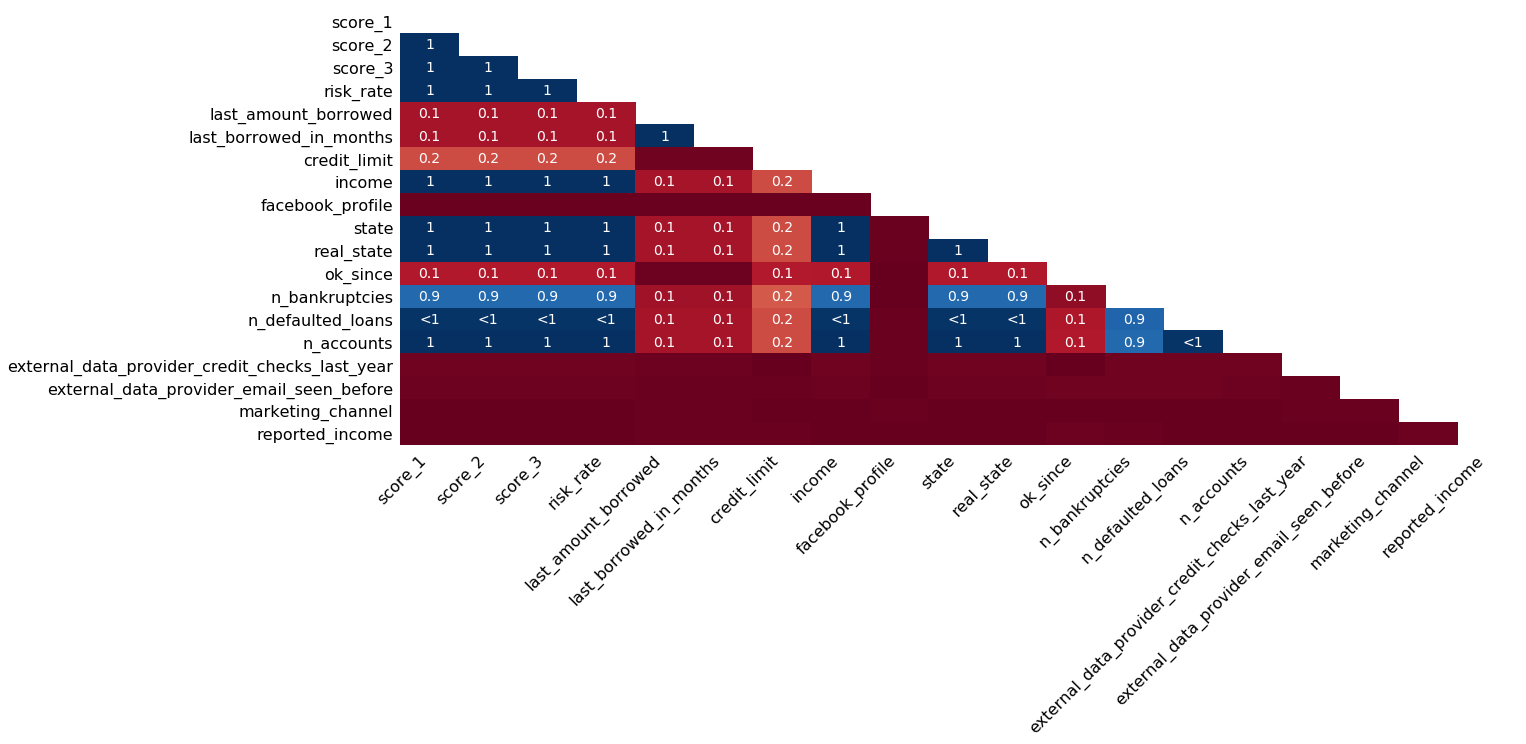

In [302]:
msno.heatmap(combo_x_null,figsize=(20,8))

Pela total correlação desses missings relacionados acima, e sua baixa representatividade na amostra (0.01%), optarei pela exclusão dessas observações do modelo de treino e imputação quando nos dados de teste.

In [303]:
idMis = acquisition.loc[acquisition.score_1.isnull(), :].index.tolist()
for df in [combo_x, acquisition_fe_y, spend_fe_y, fraud_fe_y]:
    df.drop(idMis, inplace = True)
    df.reset_index(drop = True, inplace=True)

Demais ações em relação aos outros missings

Protocolo:
- menor 0.5: ou serão alteradas, ou descartadas
- maior 0.5: amostra considerável para se realizar imputação

Features abaixo:
- last_amount_borrowed, last_borrowed_in_months, ok_since: como os dados são referentes a ações que poderiam ou não acontecer, não há zeros na amostra, assumirei que os NaN são zeros (não tomaram)

In [304]:
combo_x.last_amount_borrowed.replace(np.nan, 0, inplace = True)
combo_x.last_borrowed_in_months.replace(np.nan, 0, inplace = True)
combo_x.ok_since.replace(np.nan, 0, inplace = True)

[]

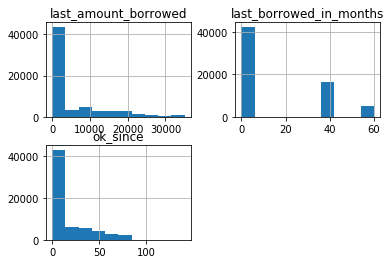

In [305]:
combo_x[['last_amount_borrowed', 'last_borrowed_in_months', 'ok_since']].hist()
plt.plot()

Agora, a análise da distribuição das variáveis numéricas faltantes para decidir o melhor método de imputação para cada uma. Como visto abaixo, as variáveis como distribuições mais normalizadas receberão imputação da média e as demais da mediana.

In [306]:
numFeatures = [feature for feature in combo_x.columns.tolist() if feature not in catFeatures]

[]

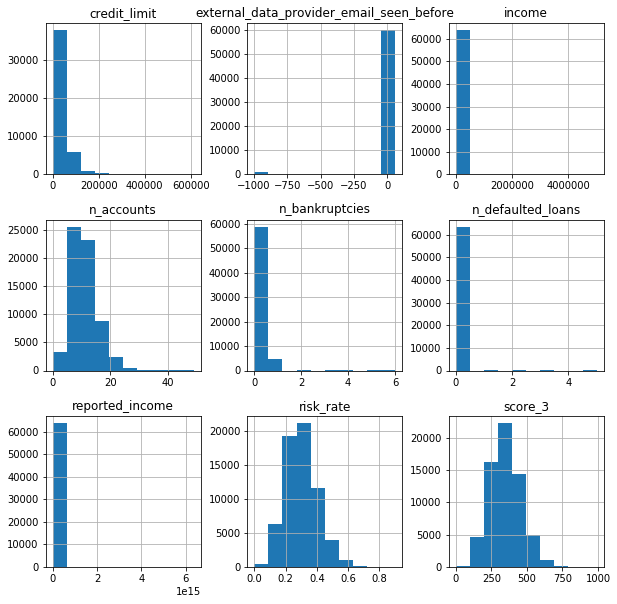

In [307]:
missingValueColumns2 = combo_x.columns[combo_x.isnull().any()].tolist()
combo_x_null2 = combo_x[combo_x[numFeatures].columns & combo_x[missingValueColumns2].columns] 
combo_x_null2.hist(figsize=(10,10))
plt.plot()

Um ponto interessante é como os valores -999 e -1 em 'external_data_provider_email_seen_before'. 

In [308]:
combo_x.external_data_provider_email_seen_before.unique()

array([  51.,   17.,    9.,   38.,   46.,   21.,   16.,   37.,    6.,
         nan,   10.,   29.,   43.,   59.,   20.,   54.,   13.,   52.,
          4.,   31.,   40.,   -1., -999.,   26.,   48.,   50.,    5.,
          3.,   39.,   11.,    0.,   58.,   55.,    2.,    1.,   53.,
         15.,   23.,   24.,   44.,   14.,   25.,   34.,   35.,   12.,
         27.,   49.,    7.,   36.,   47.,   57.,    8.,   18.,   30.,
         42.,   28.,   41.,   56.,   32.,   33.,   22.,   19.,   45.])

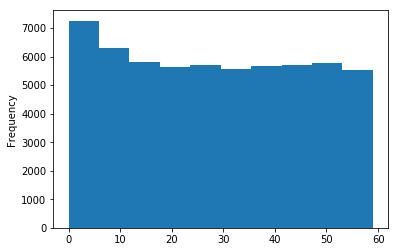

In [309]:
combo_x.external_data_provider_email_seen_before.replace([-999, -1], np.nan, inplace=True)
combo_x.external_data_provider_email_seen_before.plot('hist')

Por ter uma parência praticamente uniforme, usarei a moda como melhor representante médio da população.

In [310]:
def df_imputer (df,column_names, strat = 'mean', out = True):
    from sklearn.preprocessing import Imputer
    df = df.copy()
    imp = Imputer(missing_values=np.NaN, strategy=strat)
    for feature in column_names:
        imputed = imp.fit_transform(df[[feature]])
        imputed_df = pd.DataFrame(imputed, columns = [feature+'_imp'])
        df = pd.concat([df,imputed_df],axis=1)
        df.drop(feature, axis = 1, inplace = out)
    return df

In [311]:
meanImp = ['n_accounts', 'risk_rate', 'score_3']
medianImp = ['credit_limit', 'income', 'n_bankruptcies', 'n_defaulted_loans', 'reported_income']
modaImp = ["external_data_provider_email_seen_before"]

In [312]:
#combo_x.n_accounts.replace(np.nan, np.NaN, inplace=True)
combo_x_mea = df_imputer(combo_x, meanImp)
combo_x_med = df_imputer(combo_x_mea, medianImp, strat = 'median')
combo_x_imp = df_imputer(combo_x_med, modaImp, strat = 'most_frequent')

### Normalização das Features numéricas

In [313]:
def do_scalling(df,column_names, out = True):
    from sklearn.preprocessing import StandardScaler
    df = df.copy()
    for feature in column_names:
        scaled = StandardScaler().fit_transform(df[[feature]])
        scaled_df = pd.DataFrame(scaled, columns = [feature+'_norm'])
        df = pd.concat([df,scaled_df],axis=1)
        df.drop(feature, axis = 1, inplace = True)
    return df

In [314]:
[feature for feature in combo_x_imp.columns.tolist() if feature not in catFeatures]

['index',
 'score_4',
 'score_5',
 'score_6',
 'last_amount_borrowed',
 'ok_since',
 'application_time_in_funnel',
 'external_data_provider_fraud_score',
 'n_accounts_imp',
 'risk_rate_imp',
 'score_3_imp',
 'credit_limit_imp',
 'income_imp',
 'n_bankruptcies_imp',
 'n_defaulted_loans_imp',
 'reported_income_imp',
 'external_data_provider_email_seen_before_imp']

In [315]:
combo_x_norm = do_scalling(combo_x_imp, [feature for feature in combo_x_imp.iloc[:,1:].columns.tolist() 
                                         if feature not in catFeatures])

### One Hot Encoding

One Hot Encoding das variáveis

In [316]:
def oneHotEncoder (df, columns, out = True):
    for column in columns:
        ohe = pd.get_dummies(df[column],prefix=column,dummy_na=False, drop_first = False) # não sei ao certo se caga colocar true
        df = pd.concat([df,ohe],axis=1)
        df.drop(column, axis = 1, inplace = out)
    return df

In [317]:
combo_x_ohe = oneHotEncoder(combo_x_norm, catFeatures)

Separação em Dados de Teste e Treino

In [318]:
# Separando o array em componentes de input e output
idtrain = combo_x_ohe.loc[combo_x_ohe['index'] == 44999, :].index.tolist()
X_treino = combo_x_ohe.iloc[0:(idtrain[0]+1), 1:]
X_teste = combo_x_ohe.iloc[(idtrain[0]+1):, 1:]

In [154]:
combo_x_label = do_labelEncoding(combo_x_norm, catFeatures)

### Array de Propensão a Gasto

Como os valores possuem uma distribuição muito concentrada em valores pequenos, e com altos valores dispersos, usare uma transformação quadrática para normalizar mais sua distribuição (a logarítmica foi inviabilizada como haviam valores zero).

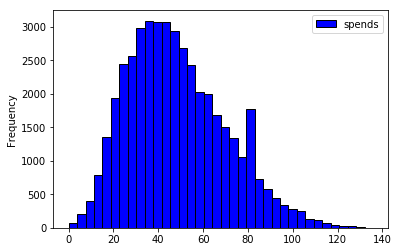

In [319]:
spend_fe_y_sqr = np.sqrt(spend_fe_y)
spend_fe_y_sqr.plot.hist(color = 'blue', edgecolor = 'black',
         bins = int(180/5))

### Array de Risco de Fraude

Seria interessante criar um modelo multiclassificação devido ao diferente impacto que as 2 categorias de fraude possuem, porém, como não fica clara a possbildiade neste desafio, optarei pela abordagem mais simples identica a do baseline.

In [320]:
fraud_fe_y.replace(np.nan, False, inplace = True)
fraud_fe_y.loc[fraud_fe_y.target_fraud != False] = True; fraud_fe_y.describe()

,target_fraud
count,44438
unique,2
top,False
freq,42951


### FE Models

Agora, com todas as modificações incluídas, usarei os modelos com as melhores performances nas etapas iniciais, fazer a seleção das variáves mais explicativas, tunagem de hiperparâmetros, e observar sua performance nos dados de treino.

### Risco de Crédito

Retirada das observações com missing na variável target.

In [130]:
acquisition_fe_y.dropna(inplace = True)
X_treino_credit = X_treino.iloc[acquisition_fe_y.index, :]

Feature Selection

Optimal number of features : 124
Best features : Index(['application_time_in_funnel_norm', 'n_accounts_imp_norm',
       'score_3_imp_norm', 'income_imp_norm',
       'external_data_provider_email_seen_before_imp_norm',
       'score_1_1Rk8w4Ucd5yR3KcqZzLdow==', 'score_1_4DLlLW62jReXaqbPaHp1vQ==',
       'score_1_8k8UDR4Yx0qasAjkGrUZLw==', 'score_1_DGCQep2AE5QRkNCshIAlFQ==',
       'score_1_e4NYDor1NOw6XKGE60AWFw==',
       ...
       'shipping_state_BR-MT', 'shipping_state_BR-PA', 'shipping_state_BR-PB',
       'shipping_state_BR-PR', 'shipping_state_BR-RO', 'shipping_state_BR-RR',
       'shipping_state_BR-RS', 'shipping_state_BR-SC', 'shipping_state_BR-SE',
       'shipping_state_BR-SP'],
      dtype='object', length=124)


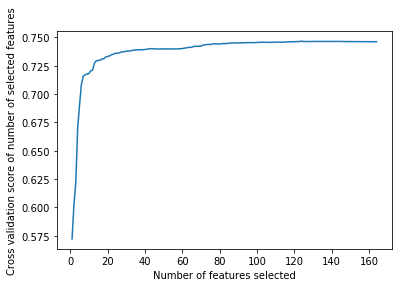

In [195]:
from sklearn.feature_selection import RFECV
model = LogisticRegression()

rfecv = RFECV(estimator=model, step=1, cv=num_folds,scoring='roc_auc')  
rfecv = rfecv.fit(X_treino_credit, acquisition_fe_y)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_treino_credit.columns[rfecv.support_])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Otimização dos hiperparâmetros

In [197]:
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

param_xgb = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

In [256]:
gsearch1 = model_selection.RandomizedSearchCV(XGBClassifier(), param_xgb, n_iter=10,
                            n_jobs=2, verbose=0, cv=num_folds,
                            scoring='roc_auc',random_state=seed)

gsearch1 = gsearch1.fit(X_treino_credit.iloc[:, rfecv.support_], acquisition_fe_y)
gsearch1.best_params_, gsearch1.best_score_

({'colsample_bytree': 0.9925672460769812,
  'gamma': 2.764625052041608,
  'learning_rate': 0.23703419831067118,
  'max_depth': 22,
  'min_child_weight': 49.2290844643288,
  'n_estimators': 30,
  'reg_alpha': 15.621271381242193,
  'subsample': 0.8182085933460475},
 0.7496426202609764)

Performance do modelo nos dados.

In [255]:
xgb = XGBClassifier(**gsearch1.best_params_)
xgb = xgb.fit(X_treino_credit.iloc[:, rfecv.support_], acquisition_fe_y)
# Compute predicted probabilities: y_pred_prob
y_pred_prob = xgb.predict_proba(X_treino_credit.iloc[:, rfecv.support_])[:,1]
# Compute and print AUC score
msg = "%s: %f" % ('XGB', roc_auc_score(acquisition_fe_y, y_pred_prob))
print(msg)

XGB: 0.761479


### Propensão a Gasto

Feature Selection.

Optimal number of features : 164
Best features : Index(['score_4_norm', 'score_5_norm', 'score_6_norm',
       'last_amount_borrowed_norm', 'ok_since_norm',
       'application_time_in_funnel_norm',
       'external_data_provider_fraud_score_norm', 'n_accounts_imp_norm',
       'risk_rate_imp_norm', 'score_3_imp_norm',
       ...
       'shipping_state_BR-PE', 'shipping_state_BR-PR', 'shipping_state_BR-RN',
       'shipping_state_BR-RO', 'shipping_state_BR-RR', 'shipping_state_BR-RS',
       'shipping_state_BR-SC', 'shipping_state_BR-SE', 'shipping_state_BR-SP',
       'shipping_state_BR-TO'],
      dtype='object', length=164)


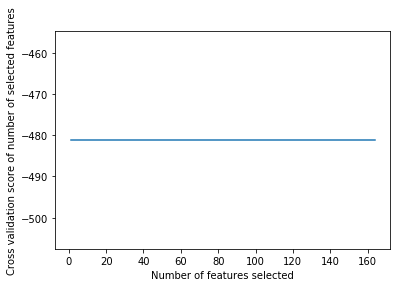

In [321]:
model2 = ElasticNet()

rfecv2 = RFECV(estimator=model2, step=1, cv=num_folds,scoring='neg_mean_squared_error')  
rfecv2 = rfecv2.fit(X_treino, spend_fe_y_sqr)
print('Optimal number of features :', rfecv2.n_features_)
print('Best features :', X_treino.columns[rfecv2.support_])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv2.grid_scores_) + 1), rfecv2.grid_scores_)
plt.show()

Otimização dos hiperparâmetros.

In [322]:
param_en = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [323]:
gsearch2 = model_selection.RandomizedSearchCV(ElasticNet(), param_en, n_iter=10,
                            n_jobs=2, verbose=0, cv=num_folds,
                            scoring='neg_mean_squared_error',random_state=seed)

gsearch2 = gsearch2.fit(X_treino.iloc[:, rfecv2.support_], spend_fe_y_sqr)
gsearch2.best_params_, gsearch2.best_score_

({'max_iter': 5, 'l1_ratio': 0.5, 'alpha': 10}, -481.13673848722317)

Performance do modelo nos dados.

In [324]:
en = ElasticNet(**gsearch2.best_params_)
en = en.fit(X_treino.iloc[:, rfecv2.support_], spend_fe_y_sqr)
# Compute predicted probabilities: y_pred_prob
y_pred_prob2 = en.predict(X_treino.iloc[:, rfecv2.support_])
# Compute and print AUC score
msg2 = "%s: %f" % ('EN', mean_squared_error((spend_fe_y_sqr**2), (y_pred_prob2**2)))
print(msg2)

EN: 6278564.363158


### Risco de Fraude

Feature Selection

Optimal number of features : 123
Best features : Index(['application_time_in_funnel_norm', 'income_imp_norm',
       'external_data_provider_email_seen_before_imp_norm',
       'score_1_1Rk8w4Ucd5yR3KcqZzLdow==', 'score_1_4DLlLW62jReXaqbPaHp1vQ==',
       'score_1_DGCQep2AE5QRkNCshIAlFQ==', 'score_1_fyrlulOiZ+5hoFqLa6UbDQ==',
       'score_1_smzX0nxh5QlePvtVf6EAeg==', 'score_2_+CxEO4w7jv3QPI/BQbyqAA==',
       'score_2_5/uMrqKj3OL/Xk5OrGx9fg==',
       ...
       'shipping_state_BR-PE', 'shipping_state_BR-PR', 'shipping_state_BR-RN',
       'shipping_state_BR-RO', 'shipping_state_BR-RR', 'shipping_state_BR-RS',
       'shipping_state_BR-SC', 'shipping_state_BR-SE', 'shipping_state_BR-SP',
       'shipping_state_BR-TO'],
      dtype='object', length=123)


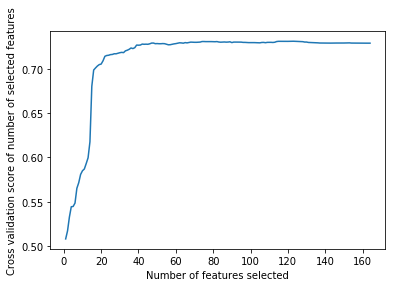

In [242]:
rfecv3 = RFECV(estimator=model, step=1, cv=num_folds,scoring='roc_auc')  
rfecv3 = rfecv3.fit(X_treino, fraud_fe_y)
print('Optimal number of features :', rfecv3.n_features_)
print('Best features :', X_treino.columns[rfecv3.support_])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv3.grid_scores_) + 1), rfecv3.grid_scores_)
plt.show()

Otimização dos hiperparâmetros

In [259]:
gsearch3 = model_selection.RandomizedSearchCV(XGBClassifier(), param_xgb, n_iter=10,
                            n_jobs=2, verbose=0, cv=num_folds,
                            scoring='neg_log_loss',random_state=seed)

gsearch3 = gsearch3.fit(X_treino.iloc[:, rfecv3.support_], fraud_fe_y)
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.9925672460769812,
  'gamma': 2.764625052041608,
  'learning_rate': 0.23703419831067118,
  'max_depth': 22,
  'min_child_weight': 49.2290844643288,
  'n_estimators': 30,
  'reg_alpha': 15.621271381242193,
  'subsample': 0.8182085933460475},
 -0.1341643777066558)

Performance do modelo nos dados.

In [270]:
msg2 = "%s: %f" % ('EN', mean_squared_error((spend_fe_y_sqr**2), (y_pred_prob2**2)))

In [260]:
from sklearn.metrics import log_loss

xgb2 = XGBClassifier(**gsearch3.best_params_)
xgb2 = xgb2.fit(X_treino.iloc[:, rfecv3.support_], fraud_fe_y)
# Compute predicted probabilities: y_pred_prob
y_pred_prob3 = xgb2.predict_proba(X_treino.iloc[:, rfecv3.support_])[:,1]
# Compute and print AUC score
msg3 = "%s: %f" % ('XGB', log_loss(fraud_fe_y, y_pred_prob3))
print(msg3)

XGB: 0.132282


Com exceção do Risco de fraude, os modelos demonstraram, por incrível que pareça, uma piora de performance após todas as alterações. Por fim, usarei os modelos com melhor desempenho para realizar as previsões finais.

# Feature Importance

A seguir, farei a plotagem das features que tiveram mais influência na determinação dos resultados.

Risco de Crédito

In [197]:
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

param_xgb = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

In [262]:
xgb_bl = XGBClassifier().fit(X_bl_treino_credit, acquisition_bl_y) 

                                          importance
feature                                             
score_1_label                                  0.149
income                                         0.086
external_data_provider_email_seen_before       0.081
facebook_profile_label                         0.081
score_3                                        0.068
last_borrowed_in_months_label                  0.059
last_amount_borrowed                           0.055
risk_rate                                      0.055
score_2_label                                  0.055
n_issues                                       0.049
application_time_in_funnel                     0.043
credit_limit                                   0.035
marketing_channel_label                        0.028
score_4                                        0.021
n_accounts                                     0.018
ok_since                                       0.016
email_label                                   

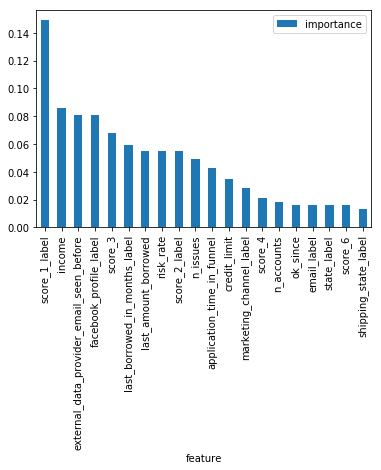

In [263]:
importances_credit = pd.DataFrame({'feature':X_bl_treino_credit.columns,'importance':np.round(xgb_bl.feature_importances_,3)})
importances_credit_top = importances_credit.sort_values('importance',ascending=False).set_index('feature').head(n=20)

print(importances_credit_top)
importances_credit_top.plot.bar()

Propensão a Gastos

In [325]:
en_bl = ElasticNet().fit(X_bl_treino, spend_bl_y)

                                                    importance
feature                                                       
external_data_provider_credit_checks_last_year_...      13.821
facebook_profile_label                                  12.616
n_accounts                                               4.256
n_defaulted_loans                                        3.533
real_state_label                                         2.896
email_label                                              2.525
risk_rate                                                1.515
score_4                                                  1.153
state_label                                              0.760
score_6                                                  0.756
score_2_label                                            0.285
n_issues                                                 0.270
ok_since                                                 0.184
score_3                                                

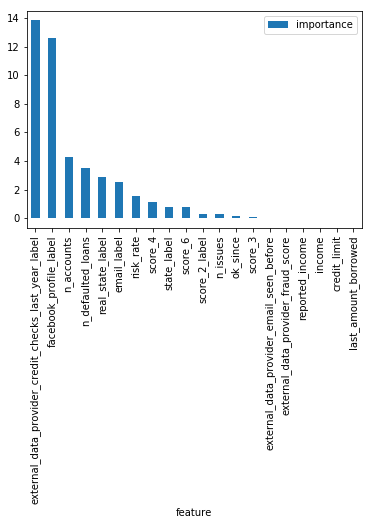

In [326]:
importances_s = pd.DataFrame({'feature':X_bl_treino.columns,'importance':np.round(en_bl.coef_,3)})
importances_s_top = importances_s.sort_values('importance',ascending=False).set_index('feature').head(n=20)

print(importances_s_top)
importances_s_top.plot.bar()

Risco de Fraude

                                                   importance
feature                                                      
external_data_provider_email_seen_before_imp_norm       0.208
application_time_in_funnel_norm                         0.104
score_1_4DLlLW62jReXaqbPaHp1vQ==                        0.094
marketing_channel_Website                               0.083
facebook_profile_True                                   0.073
email_gmail.com                                         0.073
shipping_state_BR-RR                                    0.062
shipping_state_BR-MG                                    0.062
score_1_DGCQep2AE5QRkNCshIAlFQ==                        0.052
shipping_state_BR-SP                                    0.031
email_spgov.com                                         0.031
email_hotmail.com                                       0.031
income_imp_norm                                         0.031
facebook_profile_False                                  0.021
last_bor

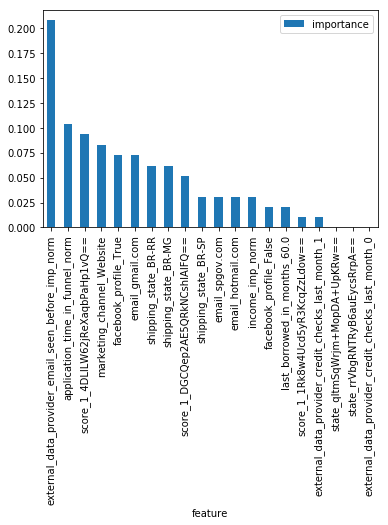

In [274]:
importances_f = pd.DataFrame({'feature':X_treino.iloc[:, rfecv3.support_].columns,'importance':np.round(xgb2.feature_importances_,3)})
importances_f_top = importances_f.sort_values('importance',ascending=False).set_index('feature').head(n=20)

print(importances_f_top)
importances_f_top.plot.bar()

Interessante notar como, da mesma maneira que visto na análise exploratória, score_1 possui uma boa influência em relação à tendência do indivíduo realizar um default ou não.

# Submissões

Após todas as análises e modificações, criarei os csv's com as predições de cada modelos.

In [329]:
idT = teste.ids

Risco de Crédito

In [348]:
sub_acq = pd.DataFrame()
sub_acq['ids'] = idT
sub_acq['target_default'] = xgb_bl.predict_proba(X_bl_teste)[:,1]
sub_acq.to_csv('target_default.csv', index=False)

Propensão a Gastos

In [347]:
sub_spend = pd.DataFrame()
sub_spend['ids'] = idT
sub_spend['spends'] = en_bl.predict(X_bl_teste)
sub_spend.to_csv('spends.csv', index=False)

Risco de Fraude

In [352]:
sub_fraud = pd.DataFrame()
sub_fraud['ids'] = idT
sub_fraud['target_fraud'] = xgb2.predict_proba(X_teste.iloc[:, rfecv3.support_])[:,1]
sub_fraud.to_csv('target_fraud.csv', index=False)